In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
summary = pd.read_csv("/itf-fi-ml/home/branisj/PCCArena/experiments/Draco/Sample_SNC/r1/Draco_Sample_SNC_r1_summary.csv")
summary["pc_file"] = summary["pc_file"].apply(lambda s: s.split("/")[-1])
summary

,pc_file,encT,decT,bpp,y_psnr,cb_psnr,cr_psnr,ssim,vmaf,acd12_p2pt,acd21_p2pt,cd_p2pt,cdpsnr_p2pt,h_p2pt,acd12_p2pl,acd21_p2pl,cd_p2pl,cdpsnr_p2pl,h_p2pl
0,6c607b6b3d6fc1cdf0d11ae402ef940e.ply,0.1218,0.1601,0.025279,NaN,NaN,NaN,NaN,NaN,1140.15,592.775,866.460,30.8206,3475.38,332.226,544.520,438.373,33.7797,3095.41
1,4bd0b6df02772d8f59c9250a427b57f.ply,0.1132,0.1957,0.019856,NaN,NaN,NaN,NaN,NaN,1066.20,740.756,903.476,30.6396,3409.27,278.725,715.058,496.892,33.2362,3102.68
2,7f9ddfff396634f17790cd6f6e8952aa.ply,0.1017,0.1921,0.030562,NaN,NaN,NaN,NaN,NaN,1122.06,696.224,909.140,31.6855,3416.23,323.595,670.679,497.137,34.3071,3318.37


In [27]:
summary = pd.read_csv("/itf-fi-ml/home/branisj/PCCArena/experiments/GPCC/Sample_SNC/r1/GPCC_Sample_SNC_r1_summary.csv")
summary["pc_file"] = summary["pc_file"].apply(lambda s: s.split("/")[-1])
summary.columns

Index(['pc_file', 'encT', 'decT', 'bpp', 'y_psnr', 'cb_psnr', 'cr_psnr',
       'ssim', 'vmaf', 'acd12_p2pt', 'acd21_p2pt', 'cd_p2pt', 'cdpsnr_p2pt',
       'h_p2pt', 'acd12_p2pl', 'acd21_p2pl', 'cd_p2pl', 'cdpsnr_p2pl',
       'h_p2pl'],
      dtype='object')

,bpp,acd12_p2pt,acd21_p2pt,cd_p2pt,cdpsnr_p2pt
algs,,,,,
Draco,2.234079,173.736497,67.821248,120.778863,53.523814
GPCC,1.990608,3.578151,2.170708,2.874430,59.144080
PCGCv1,0.347013,145.691867,32.427129,89.059508,43.005801


<Figure size 432x288 with 0 Axes>

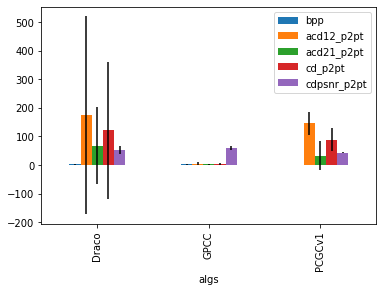

In [43]:
summary = pd.read_csv("../PCCArena/experiments/summary.csv")
summary["pc_file"] = summary["pc_file"].apply(lambda s: s.split("/")[-1])
s3dis = summary[summary.datasets == "s3dis"]
s3dis_mean = s3dis.groupby("algs").mean()
devs = s3dis.groupby('algs').std().filter(regex='a?cd.*p2pt|bpp', axis=1)
s3dis_mean = s3dis_mean.filter(regex='a?cd.*p2pt|bpp', axis=1)
plt.figure()
s3dis_mean.plot(kind="bar", yerr=devs)
s3dis_mean

,bpp,acd12_p2pt,acd21_p2pt,cd_p2pt,cdpsnr_p2pt
algs,,,,,
Draco,11.430402,189.125620,74.185369,131.655494,53.816313
GPCC,3.298763,3.346135,2.296866,2.821500,60.003527
PCGCv1,1.425553,18.547517,10.950098,14.748810,50.969389


<Figure size 432x288 with 0 Axes>

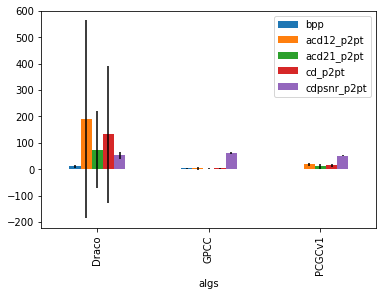

In [44]:
blensor = summary[summary.datasets == "blensor"]
blensor_mean = blensor.groupby("algs").mean()
devs = blensor.groupby('algs').std().filter(regex='a?cd.*p2pt|bpp', axis=1)
blensor_mean = blensor_mean.filter(regex='a?cd.*p2pt|bpp', axis=1)
plt.figure()
blensor_mean.plot(kind="bar", yerr=devs)
blensor_mean

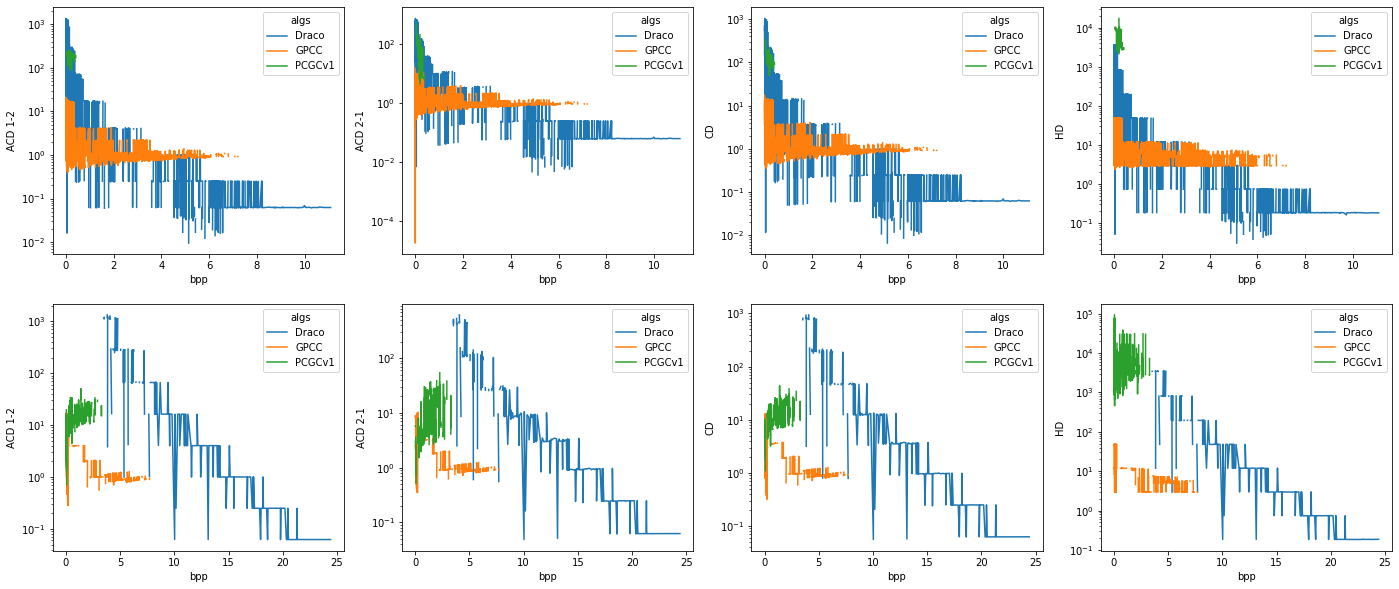

In [203]:
# try to recreate the metric/bpp graphs from the paper
# ACD to BPP per algorithm
summary = pd.read_csv("../PCCArena/experiments/summary.csv")
blensor = blensor.drop_duplicates("bpp")
# blensor = blensor.sort_values(by=['bpp'])


s3dis = summary[summary.datasets == "s3dis"]
s3dis = s3dis.drop_duplicates("bpp")


s3dis_scanned = summary[summary.datasets == "blensor"]
s3dis_scanned = s3dis_scanned.drop_duplicates("bpp")
# blensor = blensor[blensor["algs"] == "Draco"]
# blensor = blensor[blensor.bpp < 1]

col2label = {
    "acd12_p2pt": "ACD 1-2",
    "acd21_p2pt": "ACD 2-1",
    "cd_p2pt": "CD",
    "h_p2pt": "HD"
}

fig, axes = plt.subplots(nrows=2, ncols=4)
# list_marker=['o', 's', 'v']
fig.set_figwidth(24)
fig.set_figheight(10)
for i, col in enumerate(["acd12_p2pt", "acd21_p2pt", "cd_p2pt", "h_p2pt"]):
    pivoted_table = s3dis.pivot(index='bpp', columns='algs', values=col)
    pivoted_table.plot(ax=axes[0, i], markersize=2, ylabel=col2label[col], logy=True)
for i, col in enumerate(["acd12_p2pt", "acd21_p2pt", "cd_p2pt", "h_p2pt"]):
    pivoted_table = s3dis_scanned.pivot(index='bpp', columns='algs', values=col)
    pivoted_table.plot(ax=axes[1, i],  linewidth=1.5, markersize=2,ylabel=col2label[col], logy=True)

<AxesSubplot:xlabel='bpp', ylabel='Encoding time'>

<Figure size 432x288 with 0 Axes>

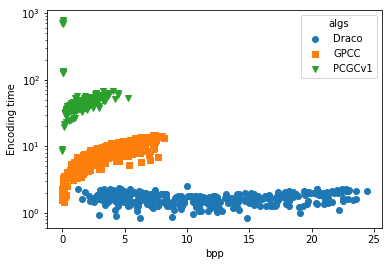

In [127]:
# try to recreate the metric/bpp graphs from the paper
# encoding time to bpp per algorithm
summary = pd.read_csv("../PCCArena/experiments/summary.csv")

blensor = summary[summary.datasets == "blensor"]
blensor = blensor.drop_duplicates("bpp")
blensor = blensor[["algs", "encT", "bpp"]]
# blensor = blensor[blensor.bpp < 1]
blensor = blensor.sort_values(by=['bpp'])
plt.figure()
print(blensor)
list_marker=['o', 's', 'v']
blensor = blensor.pivot(index='bpp', columns='algs', values='encT')
print(blensor)
blensor.plot(kind="line", style=list_marker, ylabel="Encoding time", logy=True)

In [8]:
summary = pd.read_csv("/itf-fi-ml/home/branisj/PCCArena/experiments/Draco/s3dis/r1/Draco_s3dis_r1_summary.csv")
summary["pc_file"] = summary["pc_file"].apply(lambda s: s.split("/")[-1])
summary

,pc_file,encT,decT,bpp,y_psnr,cb_psnr,cr_psnr,ssim,vmaf,acd12_p2pt,acd21_p2pt,cd_p2pt,cdpsnr_p2pt,h_p2pt,acd12_p2pl,acd21_p2pl,cd_p2pl,cdpsnr_p2pl,h_p2pl
0,Area_5_office_23.ply,0.2923,0.1859,0.021934,NaN,NaN,NaN,NaN,NaN,1194.410000,484.135000,839.272000,32.5599,3471.780000,NaN,NaN,NaN,NaN,NaN
1,Area_4_office_15.ply,0.2510,0.2829,0.036209,NaN,NaN,NaN,NaN,NaN,1012.060000,365.110000,688.582000,34.9634,3449.060000,NaN,NaN,NaN,NaN,NaN
2,Area_2_office_13.ply,0.2217,0.4390,0.041761,NaN,NaN,NaN,NaN,NaN,983.389000,309.438000,646.413000,34.6349,3382.140000,NaN,NaN,NaN,NaN,NaN
3,Area_4_conferenceRoom_2.ply,0.5272,0.3670,0.012910,NaN,NaN,NaN,NaN,NaN,967.396000,275.810000,621.603000,34.3793,3461.020000,NaN,NaN,NaN,NaN,NaN
4,Area_4_lobby_2.ply,0.6698,0.4266,0.009176,NaN,NaN,NaN,NaN,NaN,1051.720000,345.915000,698.819000,33.5875,3449.500000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,office_14.ply,1.1233,0.2947,5.323282,NaN,NaN,NaN,NaN,NaN,0.030741,0.012807,0.021774,33.0273,0.099883,NaN,NaN,NaN,NaN,NaN
315,office_7.ply,1.2929,0.3716,6.275230,NaN,NaN,NaN,NaN,NaN,0.018883,0.006808,0.012845,34.0445,0.062615,NaN,NaN,NaN,NaN,NaN
316,office_8.ply,1.1335,0.3769,4.315804,NaN,NaN,NaN,NaN,NaN,0.036299,0.015096,0.025697,32.6952,0.114830,NaN,NaN,NaN,NaN,NaN
317,WC_1.ply,1.7513,0.4334,4.207427,NaN,NaN,NaN,NaN,NaN,0.047190,0.017108,0.032149,33.2019,0.152930,NaN,NaN,NaN,NaN,NaN


   color  x   y
0    red  0   0
1    red  1   1
2    red  2   2
3    red  3   3
4    red  4   4
5    red  5   5
6    red  6   6
7    red  7   7
8    red  8   8
9    red  9   9
10  blue  0   0
11  blue  1   1
12  blue  2   4
13  blue  3   9
14  blue  4  16
15  blue  5  25
16  blue  6  36
17  blue  7  49
18  blue  8  64
19  blue  9  81
color  blue  red
x               
0         0    0
1         1    1
2         4    2
3         9    3
4        16    4
5        25    5
6        36    6
7        49    7
8        64    8
9        81    9


<AxesSubplot:xlabel='x'>

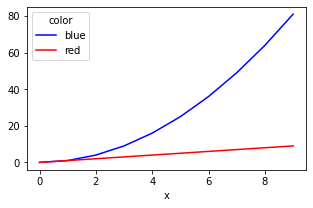

In [85]:
# sample data
df = pd.DataFrame([['red', 0, 0], ['red', 1, 1], ['red', 2, 2], ['red', 3, 3], ['red', 4, 4], ['red', 5, 5], ['red', 6, 6], ['red', 7, 7], ['red', 8, 8], ['red', 9, 9], ['blue', 0, 0], ['blue', 1, 1], ['blue', 2, 4], ['blue', 3, 9], ['blue', 4, 16], ['blue', 5, 25], ['blue', 6, 36], ['blue', 7, 49], ['blue', 8, 64], ['blue', 9, 81]], columns=['color', 'x', 'y'])
print(df)
# pivot the data into the correct shape
df = df.pivot(index='x', columns='color', values='y')
print(df)

# plot the pivoted dataframe; if the column names aren't colors, remove color=df.columns
df.plot(color=df.columns, figsize=(5, 3))

In [22]:
summary = pd.read_csv("/itf-fi-ml/home/branisj/PCCArena/experiments/GPCC/s3dis/r2/GPCC_s3dis_r2_summary.csv")
summary["pc_file"] = summary["pc_file"].apply(lambda s: s.split("/")[-1])
summary

,pc_file,encT,decT,bpp,y_psnr,cb_psnr,cr_psnr,ssim,vmaf,acd12_p2pt,acd21_p2pt,cd_p2pt,cdpsnr_p2pt,h_p2pt,acd12_p2pl,acd21_p2pl,cd_p2pl,cdpsnr_p2pl,h_p2pl
0,Area_5_office_23.ply,3.2797,1.5236,0.259058,NaN,NaN,NaN,NaN,NaN,3.90928,2.48760,3.19844,56.7496,11.7855,NaN,NaN,NaN,NaN,NaN
1,Area_4_office_15.ply,3.3769,1.9957,0.529738,NaN,NaN,NaN,NaN,NaN,3.95497,2.95911,3.45704,57.9559,11.8395,NaN,NaN,NaN,NaN,NaN
2,Area_2_office_13.ply,2.6284,1.8297,0.682622,NaN,NaN,NaN,NaN,NaN,4.00271,3.11041,3.55656,57.2297,11.8628,NaN,NaN,NaN,NaN,NaN
3,Area_4_conferenceRoom_2.ply,4.7054,1.6835,0.124817,NaN,NaN,NaN,NaN,NaN,4.06653,2.26055,3.16354,57.3127,11.8627,NaN,NaN,NaN,NaN,NaN
4,Area_4_lobby_2.ply,4.9980,1.3426,0.080854,NaN,NaN,NaN,NaN,NaN,4.37303,2.36355,3.36829,56.7571,11.8674,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Area_2_storage_8.ply,1.3932,1.1484,1.634988,NaN,NaN,NaN,NaN,NaN,3.98754,3.48323,3.73539,57.7354,11.6196,NaN,NaN,NaN,NaN,NaN
269,Area_3_office_7.ply,2.9657,1.6297,0.373377,NaN,NaN,NaN,NaN,NaN,4.01660,2.72358,3.37009,56.2404,11.9269,NaN,NaN,NaN,NaN,NaN
270,Area_6_office_22.ply,2.2506,1.5481,0.762859,NaN,NaN,NaN,NaN,NaN,4.06256,3.23551,3.64903,57.5853,11.7211,NaN,NaN,NaN,NaN,NaN
271,Area_4_office_14.ply,1.5443,1.2871,1.792046,NaN,NaN,NaN,NaN,NaN,4.04018,3.62250,3.83134,58.0562,11.6793,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.figure()
summary.plot()